# Rent Analysis

## Data Origin:
Scrapped the data from Craiglist to analyze the rent trends on Vancouver.

## Data Cleaning

In [2]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Read the csv file
df = pd.read_csv('craiglist_scrapping.csv')
# Check how's the data
df.head(-5)

,Image,Title_URL,Label,meta,postbedrooms,postsqft,Price
0,NaN,https://vancouver.craigslist.org/rds/apa/d/whi...,"2B/1B, Secure Building, Situated in White Rock!","5 mins ago2br919ft21371 Blackwood Street, Whit...",2br,919ft2,"$2,695"
1,https://images.craigslist.org/d/7821650965/00O...,https://vancouver.craigslist.org/van/apa/d/van...,1Bedroom available in Cozy Laneway house 2 bal...,7 mins ago1brVancouver,1br,NaN,"$1,195"
2,https://images.craigslist.org/d/7815177258/010...,https://vancouver.craigslist.org/rds/apa/d/por...,HOUSE RENT,9 mins ago4br1250ft2Port Coquitlam,4br,1250ft2,"$3,600"
3,https://images.craigslist.org/d/7815176765/00O...,https://vancouver.craigslist.org/pml/apa/d/por...,HOUSE RENT,9 mins ago3br1250ft2Port Coquitlam,3br,1250ft2,"$3,600"
4,https://images.craigslist.org/d/7815608705/010...,https://vancouver.craigslist.org/bnc/apa/d/por...,HOUSE RENT,9 mins ago3br1250ft2Port Coquitlam,3br,1250ft2,"$3,600"
...,...,...,...,...,...,...,...
6350,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",https://vancouver.craigslist.org/van/apa/d/van...,Beautifully Renovated Upper Floor Suite - 3 Be...,1/253br1200ft2Vancouver,3br,1200ft2,"$3,980"
6351,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",https://vancouver.craigslist.org/van/apa/d/van...,One bedroom apartment for rent,1/251br610ft2kitsilano,1br,610ft2,"$2,250"
6352,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",https://vancouver.craigslist.org/van/apa/d/van...,"Public Art Display by Khan Lee, 100% Smoke-Fre...","1/251br662ft2333 E 11th Ave, Vancouver, BC",1br,662ft2,"$2,550"
6353,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",https://vancouver.craigslist.org/rds/apa/d/sur...,"2 bed, 2 bath, short term, LOWEST rate!",1/252brSurrey,2br,NaN,"$2,000"


### Observations
- Images are irrelevant so it's better to erase the column.
- Label column indicates the description. 
- Meta column has different avlues that need to be separated in the next order:
-- Before the "br" word it indicates how many bedrooms the place has but as we have it in other column we're gonna drop it.
-- After the "br" some houses have the "ft2" value and number that indicates the space. (Not all of them have this description)
-- At the end you can see the name of the place where the house is.

In [4]:
# Find duplicated values
df.duplicated().sum()

4080

In [5]:
# Remove the duplicated values
df.drop_duplicates(inplace = True)

In [6]:
# Extact the location on the meta column
def extract_location(meta):
    # Check if the input is a valid string
    if not isinstance(meta, str) or not meta.strip():
        return ""
    
    # Remove ', BC' from the end if it exists
    result = meta.replace(', BC', '')
    
    # Split the string wherever a digit (0–9) is found
    parts = re.split(r'[0-9]', result)
    
    # Return the last non-empty part after the split
    return parts[-1].strip() if parts else ""

# Apply the function to the 'meta' column
df['zone_name'] = df['meta'].apply(extract_location)

# View the updated DataFrame
print(df.head(-5))


                                                  Image  \
0                                                   NaN   
1     https://images.craigslist.org/d/7821650965/00O...   
2     https://images.craigslist.org/d/7815177258/010...   
3     https://images.craigslist.org/d/7815176765/00O...   
4     https://images.craigslist.org/d/7815608705/010...   
...                                                 ...   
6350  data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...   
6351  data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...   
6352  data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...   
6353  data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...   
6354  https://images.craigslist.org/d/7815759455/00Y...   

                                              Title_URL  \
0     https://vancouver.craigslist.org/rds/apa/d/whi...   
1     https://vancouver.craigslist.org/van/apa/d/van...   
2     https://vancouver.craigslist.org/rds/apa/d/por...   
3     https://vancouver.craigslist.org/pml/apa/d/por...

In [7]:
# Take off the "br" from the "postbedrooms" column and "ft2" from the "postsqft" column and $ on Price
df['postbedrooms'] = df['postbedrooms'].str.replace(r'br','', regex=True)
df['postsqft'] = df['postsqft'].str.replace(r'ft2','', regex=True)
df['Price'] = df['Price'].str.replace(r'[\$]','', regex=True)
df.head(-5)

,Image,Title_URL,Label,meta,postbedrooms,postsqft,Price,zone_name
0,NaN,https://vancouver.craigslist.org/rds/apa/d/whi...,"2B/1B, Secure Building, Situated in White Rock!","5 mins ago2br919ft21371 Blackwood Street, Whit...",2,919,"2,695","Blackwood Street, White Rock"
1,https://images.craigslist.org/d/7821650965/00O...,https://vancouver.craigslist.org/van/apa/d/van...,1Bedroom available in Cozy Laneway house 2 bal...,7 mins ago1brVancouver,1,NaN,"1,195",brVancouver
2,https://images.craigslist.org/d/7815177258/010...,https://vancouver.craigslist.org/rds/apa/d/por...,HOUSE RENT,9 mins ago4br1250ft2Port Coquitlam,4,1250,"3,600",Port Coquitlam
3,https://images.craigslist.org/d/7815176765/00O...,https://vancouver.craigslist.org/pml/apa/d/por...,HOUSE RENT,9 mins ago3br1250ft2Port Coquitlam,3,1250,"3,600",Port Coquitlam
4,https://images.craigslist.org/d/7815608705/010...,https://vancouver.craigslist.org/bnc/apa/d/por...,HOUSE RENT,9 mins ago3br1250ft2Port Coquitlam,3,1250,"3,600",Port Coquitlam
...,...,...,...,...,...,...,...,...
6350,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",https://vancouver.craigslist.org/van/apa/d/van...,Beautifully Renovated Upper Floor Suite - 3 Be...,1/253br1200ft2Vancouver,3,1200,"3,980",Vancouver
6351,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",https://vancouver.craigslist.org/van/apa/d/van...,One bedroom apartment for rent,1/251br610ft2kitsilano,1,610,"2,250",kitsilano
6352,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",https://vancouver.craigslist.org/van/apa/d/van...,"Public Art Display by Khan Lee, 100% Smoke-Fre...","1/251br662ft2333 E 11th Ave, Vancouver, BC",1,662,"2,550","th Ave, Vancouver"
6353,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",https://vancouver.craigslist.org/rds/apa/d/sur...,"2 bed, 2 bath, short term, LOWEST rate!",1/252brSurrey,2,NaN,"2,000",brSurrey


In [8]:
# Datatypes
df.dtypes

Image           object
Title_URL       object
Label           object
meta            object
postbedrooms    object
postsqft        object
Price           object
zone_name       object
dtype: object

In [9]:
# Dropping columns that are not needed.
df = df.drop('Image', axis=1)
df = df.drop('meta', axis=1)
df = df.drop("Title_URL", axis = 1)

In [10]:
# find empty values
df.isnull().sum()

Label             0
postbedrooms    119
postsqft        359
Price             1
zone_name         0
dtype: int64

In [11]:
# Convert column to numeric (to handle strings) and replace NaN with 0
df['postsqft'] = pd.to_numeric(df['postsqft'], errors='coerce').fillna(0).astype(int)
df['postbedrooms'] = pd.to_numeric(df['postbedrooms'], errors='coerce').fillna(0).astype(int)
# Step 1: Remove commas and directly convert to integers
df['Price'] = df['Price'].replace({',': ''}, regex=True)  # Remove commas
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')  # Convert to numeric, invalid parsing becomes NaN

df['Price'].head(-10)

0       2695.0
1       1195.0
2       3600.0
3       3600.0
4       3600.0
         ...  
6345    2725.0
6346    2690.0
6347    2015.0
6348    2395.0
6349    2355.0
Name: Price, Length: 2270, dtype: float64

In [12]:
# let's see how many NaN values are in the data base
df.isnull().sum()

Label           0
postbedrooms    0
postsqft        0
Price           1
zone_name       0
dtype: int64

In [13]:
df.describe()

,postbedrooms,postsqft,Price
count,2280.000000,2280.000000,2279.000000
mean,1.823684,827.561404,2959.821852
std,1.094307,752.162605,1922.957261
min,0.000000,0.000000,1.000000
25%,1.000000,500.000000,2100.000000
50%,2.000000,700.000000,2595.000000
75%,2.000000,960.000000,3267.500000
max,8.000000,7457.000000,45000.000000


In [14]:
# As it is just one we're going to replace it with the mean and turn into integer.
df['Price'] = df['Price'].fillna(df['Price'].mean())
df['Price'] = df['Price'].astype(int)

In [15]:
# Definig the type of each column
df['postbedrooms'] = df['postbedrooms'].astype("int")
df['postsqft'] = df['postsqft'].astype("int")
df['Price'] = df['Price'].astype("int")
df['zone_name'] = df['zone_name'].astype("category")

In [16]:
# Check null values
df.dtypes

Label             object
postbedrooms       int32
postsqft           int32
Price              int32
zone_name       category
dtype: object

In [17]:
df.head(2)

,Label,postbedrooms,postsqft,Price,zone_name
0,"2B/1B, Secure Building, Situated in White Rock!",2,919,2695,"Blackwood Street, White Rock"
1,1Bedroom available in Cozy Laneway house 2 bal...,1,0,1195,brVancouver


In [18]:
df['zone_name'].unique()

['Blackwood Street, White Rock', 'brVancouver', 'Port Coquitlam', 'Coquitlam', 'Lynn Valley', ..., 'Surrey (Tynehead Park)', 'Clayton Heights', 'Seafair, Richmond', 'kitsilano', 'E Pender St, Vancouver']
Length: 726
Categories (726, object): ['', '(False Creek', '(Killarney/Collingwood)', '(North Vancouver)', ..., 'xx MacDonald Street Vancouver', 'yaletown', 'yorkson / willoughby / Langley', '📌West Coquitlam']

In [19]:
# Lower case the "zone_name" column to clean it.
df['zone_name'] = df['zone_name'].str.lower()

In [20]:
# Replace al strings that have a "Vancouver" with just "Vancouver"
df['zone_name'] = df['zone_name'].str.replace(r'.*surrey.*', 'surrey', regex=True)
df['zone_name'] = df['zone_name'].str.replace(r'.*\b(burnaby|brentwood|metrotown)\b.*', 'burnaby', regex=True)
df['zone_name'] = df['zone_name'].str.replace(r'.*richmond.*', 'richmond', regex=True)
df['zone_name'] = df['zone_name'].str.replace(r'.*delta.*', 'delta', regex=True)
df['zone_name'] = df['zone_name'].str.replace(r'.*maple ridge.*', 'maple ridge', regex=True)
df['zone_name'] = df['zone_name'].str.replace(r'.*pitt meadows.*', 'pitt meadows', regex=True)
df['zone_name'] = df['zone_name'].str.replace(r'.*white rock.*', 'white rock', regex=True)
df['zone_name'] = df['zone_name'].str.replace(r'.*langley.*', 'langley', regex=True)
df['zone_name'] = df['zone_name'].str.replace(r'.*coquitlam.*', 'coquitlam', regex=True)
df['zone_name'] = df['zone_name'].str.replace(r'.*tsawwassen.*', 'tsawwassen', regex=True)
df['zone_name'] = df['zone_name'].str.replace(r'.*port moody.*', 'port moody', regex=True)
df['zone_name'] = df['zone_name'].str.replace(r'.*new westminster.*', 'port moody', regex=True)
df['zone_name'] = df['zone_name'].str.replace(
    r'.*\b(north|west) vancouver\b.*', r'\1 vancouver', regex=True  # Preserve special cases
)

# Replace remaining patterns containing "Vancouver" with "Vancouver"
df['zone_name'] = df['zone_name'].str.replace(
    r'.*vancouver.*', 'vancouver', regex=True)

# If the value is not then turn into vancouver
df['zone_name'] = df['zone_name'].apply(lambda x: x if x in [
    'surrey', 'burnaby', 'richmond', 'delta', 'maple ridge', 'pitt meadows', 'white rock', 'langley', 'coquitlam'
    , 'tsawwassen', 'port moody', 'vancouver'] else 'vancouver')

df['zone_name'].unique()

array(['white rock', 'vancouver', 'coquitlam', 'burnaby', 'pitt meadows',
       'port moody', 'richmond', 'surrey', 'tsawwassen', 'maple ridge',
       'langley', 'delta'], dtype=object)

In [21]:
df['zone_name'].value_counts()

zone_name
vancouver       1314
surrey           328
burnaby          246
coquitlam        114
port moody       102
richmond          96
white rock        23
langley           23
maple ridge       20
delta              8
tsawwassen         5
pitt meadows       1
Name: count, dtype: int64

In [22]:
df.head(10)

,Label,postbedrooms,postsqft,Price,zone_name
0,"2B/1B, Secure Building, Situated in White Rock!",2,919,2695,white rock
1,1Bedroom available in Cozy Laneway house 2 bal...,1,0,1195,vancouver
2,HOUSE RENT,4,1250,3600,coquitlam
3,HOUSE RENT,3,1250,3600,coquitlam
4,HOUSE RENT,3,1250,3600,coquitlam
5,Coquitlam Center Eagles Ridge Upper Floor 3 be...,3,1500,3100,coquitlam
6,"Bright legal bachelor suite steps from shops, ...",0,470,1950,vancouver
7,Yaletown Skyline Spacious 2 Bed 2 Bath+Den 2 E...,2,1040,4300,vancouver
8,"1 Bed, 1 Bath Basement with car parking",1,750,1600,coquitlam
9,UBC Students/Professionals Group/Family/Daycar...,6,3300,7000,vancouver


In [23]:
# Data Set is cleaned!

In [24]:
df.describe()

,postbedrooms,postsqft,Price
count,2280.000000,2280.000000,2280.000000
mean,1.823684,827.561404,2959.821491
std,1.094307,752.162605,1922.535329
min,0.000000,0.000000,1.000000
25%,1.000000,500.000000,2100.000000
50%,2.000000,700.000000,2595.000000
75%,2.000000,960.000000,3266.250000
max,8.000000,7457.000000,45000.000000


### Removing outliers

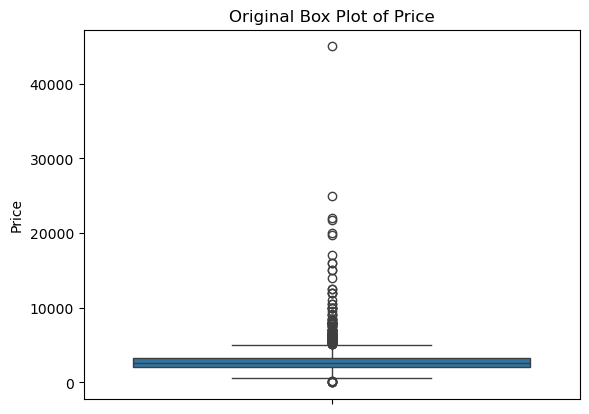

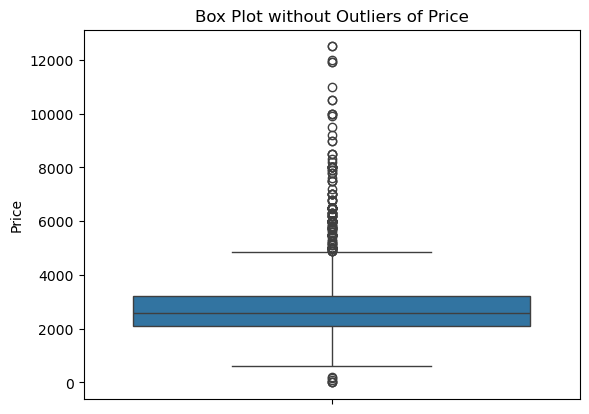

In [25]:
# Removing outliers
def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = df[df[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers

threshold_value = 12500

df = removal_box_plot(df, 'Price', threshold_value)

# Final Observations EDA
- Most of the values were duplicated as people tends to re-activate or re-publish the same add over and over.
- Cleaning took a lot of time since there were many values to separate and to polish to get to a uniformed type of data for each column.

In [26]:
df.columns

Index(['Label', 'postbedrooms', 'postsqft', 'Price', 'zone_name'], dtype='object')

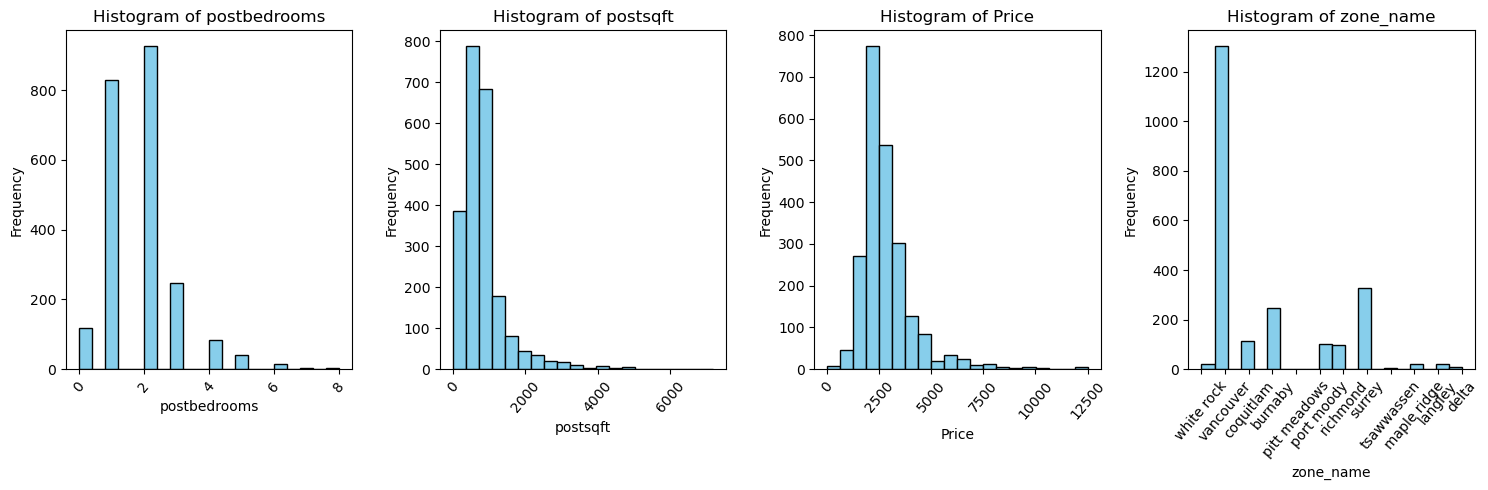

In [27]:
columns = ['postbedrooms', 'postsqft', 'Price', 'zone_name']

# plotting area
plt.figure(figsize=(15, 5))

# loop through the selected columns and creating a histogram
for i, column in enumerate(columns, 1):
    plt.subplot(1, len(columns), i)
    counts, bins, patches = plt.hist(df[column].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

In [28]:
# Checking correlations
# Filter columns that are numerical in the original df
numerical_df = df.select_dtypes(include=[float, int])
correlation_matrix = numerical_df.corr()
correlation_matrix

,postbedrooms,postsqft,Price
postbedrooms,1.000000,0.683829,0.621380
postsqft,0.683829,1.000000,0.682502
Price,0.621380,0.682502,1.000000


In [29]:
# Sort in descending order
rent_correlation = correlation_matrix['Price'].sort_values(ascending = False)
rent_correlation

Price           1.000000
postsqft        0.682502
postbedrooms    0.621380
Name: Price, dtype: float64

## Encoding Categorical feature.

In [30]:
# Create a copy of df to keep the original intact
df_final = df.copy()
# Drop the "Label" column as it won't help in the ML model.
df_final = df_final.drop(columns=['Label'])
df_final.head(3)

,postbedrooms,postsqft,Price,zone_name
0,2,919,2695,white rock
1,1,0,1195,vancouver
2,4,1250,3600,coquitlam


In [31]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'zone_name' column
df_final['zone_name_encoded'] = label_encoder.fit_transform(df_final['zone_name'])
df_final = df_final.drop(columns=['zone_name'])
df_final.head(2)

,postbedrooms,postsqft,Price,zone_name_encoded
0,2,919,2695,11
1,1,0,1195,10


### Comments
The application of Label Encoding is justified as there are values like Vancouver that because is the biggest city has more demand than other cities nearby such as Burnaby, Coquitlam and such.

### Feature Scaling

In [32]:
# Separate features (X) and target (y) from df_final
X = df_final.drop(columns=['Price'])  # Drop "Price" to use all other columns as features
y = df_final['Price']  # target column to predict

### Comments
Since the data is not normally distributed then Standard Scaler is not a great option. There are not so many outliers so robust scaling is not appropiate. So MinMax is a great option since the prices can vary from range to range which is considerable for the model.

In [33]:
# Initialize MinMaxScaler
# scaler = MinMaxScale()
scaler = StandardScaler()

# Fit and transform the features (X)
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame for better readability
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Show the result
X_scaled_df.head(3)

,postbedrooms,postsqft,zone_name_encoded
0,0.175004,0.154978,0.928926
1,-0.752354,-1.154082,0.645677
2,2.029720,0.626468,-1.903562


### Initial train test with 20% for testing

In [34]:
# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

test_size=0.2 means 80% of the data will be used for training and 20% for testing.

#### Testing linear Regression

In [35]:
# Instantiate the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 786966.1054507389
R-squared: 0.5504033026104311


Low values on r squared and huge MSE. Is not a good model.

In [36]:
# Instantiate the RandomForestRegressor model
model_rf = RandomForestRegressor(random_state=42)  # random_state for reproducibility

# Train the model
model_rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = model_rf.predict(X_test)

# Calculate Mean Squared Error
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Calculate R-squared
r2_rf = r2_score(y_test, y_pred_rf)

# Print the results
print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R-squared (Random Forest): {r2_rf}')

Mean Squared Error (Random Forest): 626312.4388860837
R-squared (Random Forest): 0.6421853468569546


R Squared improved. However the dataset needs more features to get better predictions.
Random Forest was chosen because it provides high accuracy since it combines the results of multiple decision trees. Since it averages over many trees, it's less prone to overfitting compared to a single decision tree. It works with small and large datasets.


## Trying the model

In [37]:
# Predict house prices for new data

# Example raw user input
raw_data = pd.DataFrame({
    'postbedrooms': [1, 2, 4],         # Number of bedrooms
    'postsqft': [40, 800, 2200],     # Square footage
    'zone_name': ['vancouver', 'burnaby', 'coquitlam']  # Zone names
})

# Initialize LabelEncoder and MinMaxScaler
label_encoder = LabelEncoder()
scaler = StandardScaler()

# Fit the encoder on the original 'zone_name' values (same as during training)
raw_data['zone_name_encoded'] = label_encoder.fit_transform(raw_data['zone_name'])

# Apply scaling to the features ('postbedrooms' and 'postsqft')
# Fit the scaler on the training data (use X_train[scaled_features] to fit during training)
scaler.fit(X_train[['postbedrooms', 'postsqft']])
raw_data[['postbedrooms', 'postsqft']] = scaler.transform(raw_data[['postbedrooms', 'postsqft']])

# Predict using the preprocessed data
predictions = model_rf.predict(raw_data[['postbedrooms', 'postsqft', 'zone_name_encoded']])

# Output the predicted prices
print(f"Predicted prices: {predictions}")

Predicted prices: [10755.75  6013.4  10450.1 ]
